<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/4_Initial_modelling_(all_simple_models_based_on_filtered_dataset120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Initial modelling (all simple models based on filtered_dataset120.ipynb


---

#### Load Libraries

In [1]:

!pip install tensorflow
!pip install scikeras

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and Time Utilities
from datetime import datetime

# Machine Learning - Model Selection and Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Machine Learning - Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Metrics for Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Deep Learning with Keras and TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor  # Wrapper for Keras models

# Statistical Analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hyperparameter Tuning
from scipy.stats import uniform, randint

# Suppress user warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from tabulate import tabulate

from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

sns.set(style='white', context='notebook', palette='deep')

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
sns.set(style='white', context='notebook', palette='deep')
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
# Import required libraries
from sklearn.linear_model import LinearRegression  # Linear Regression
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regressor
from sklearn.svm import SVR  # Support Vector Regressor
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors Regressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor  # Ensemble Regressors
from xgboost import XGBRegressor  # XGBoost Regressor
from sklearn.neural_network import MLPRegressor  # Multi-layer Perceptron Regressor

# Metrics for evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Visualization and utility
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate  # For summary table


In [3]:
# Adjust settings to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [4]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path for the CSV file in the subdirectory
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/filtered_dataset120.csv'

# Load the CSV file into a pandas DataFrame called "filtered_dataset120"
try:
    filtered_dataset120 = pd.read_csv(file_path)

    # Display information about the DataFrame
    print("\nDataset Info:")
    filtered_dataset120.info()  # Information about columns, data types, and memory usage

    # Display the shape of the DataFrame
    print("\nDataset Shape:")
    print(f"Rows: {filtered_dataset120.shape[0]}, Columns: {filtered_dataset120.shape[1]}")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path and ensure it exists.")

Mounted at /content/drive

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102229 entries, 0 to 102228
Data columns (total 69 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   saleable_area(ft^2)                             102229 non-null  int64  
 1   unit_rate                                       102229 non-null  int64  
 2   district                                        102229 non-null  object 
 3   floor                                           102229 non-null  float64
 4   FormattedDate                                   102229 non-null  object 
 5   YearQuarter                                     102229 non-null  object 
 6   CG                                              102229 non-null  float64
 7   CI                                              102229 non-null  float64
 8   CPI                                             102229 non-null

# Option 1 - FILTERED DATASET

# Check and preprocess the data

In [7]:
import pandas as pd

# Assuming the dataset is loaded into a DataFrame called df
# Replace 'your_dataset.csv' with the actual file name if loading from a CSV
# df = pd.read_csv('your_dataset.csv')

# List of specific columns to drop
columns_to_drop = [
    'region_cat',         # Categorical column with missing values
    'region_color',       # Possibly irrelevant metadata
    'new_price_million',  # Derived from new_price
    'price_per_sqft',     # Derived from new_price and saleable_area(ft^2)
    'new_price_millions', # Duplicate of new_price_million
    'unit_rate',          # Derived from new_price and saleable_area(ft^2)
    'region',             # Categorical column with missing values
]

# Drop the specified columns
filtered_dataset120 = filtered_dataset120.drop(columns=columns_to_drop)

# Dynamically drop all columns with data type 'object'
filtered_dataset120 = filtered_dataset120.select_dtypes(exclude=['object'])

# Display the cleaned dataset information
print(filtered_dataset120.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102229 entries, 0 to 102228
Data columns (total 58 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   saleable_area(ft^2)                             102229 non-null  int64  
 1   floor                                           102229 non-null  float64
 2   CG                                              102229 non-null  float64
 3   CI                                              102229 non-null  float64
 4   CPI                                             102229 non-null  float64
 5   GDP                                             102229 non-null  float64
 6   HS                                              102229 non-null  float64
 7   IR                                              102229 non-null  float64
 8   LTV                                             102229 non-null  float64
 9   M3                        

In [8]:
# Save the cleaned data into the specified subdirectory
output_file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/filtered_dataset120ML.csv'
filtered_dataset120.to_csv(output_file_path, index=False)

# Confirm the save operation
print(f"Filtered dataset saved successfully at: {output_file_path}")

Filtered dataset saved successfully at: /content/drive/My Drive/Colab Notebooks/M5 Code and Data/filtered_dataset120ML.csv


# Training starts from here
### Defining the feature matrix (X) and target variables (y) from the merged dataset.

In [9]:
# Define the feature matrix (X) and target variables (y)

features = filtered_dataset120.drop(columns=['new_price', 'PI'])
targets_120 = filtered_dataset120[['new_price', 'PI']]

X = features.copy()
y = targets_120.copy()

In [10]:
features.head()

,saleable_area(ft^2),floor,CG,CI,CPI,GDP,HS,IR,LTV,M3,MW,PG,SD,SM,SOLD,UR,district_Central and Western District,district_HKIsIand Eastern District,district_HKIsIand Southern District,district_Kowloon Kowloon City District,district_Kowloon Kwun Tong District,district_Kowloon Sham Shui Po District,district_Kowloon Wong Tai Sin District,district_Kowloon Yau Tsim Mong District,district_Kwai Tsing District,district_New Territories East Long Ping Estate,district_New Territories East North District,district_New Territories East Sha Tin District,district_New Territories East Tai Po District,district_New Territories West Islands District,district_Tsuen Wan District,district_Tuen Mun District,district_Wan Chai District,district_Yuen Long District,region_HK,region_KLN,region_NTEast,region_NTWest,property_size_Large,property_size_Medium,property_size_Small,property_size_Very Large,YearQuarter_2020Q1,YearQuarter_2020Q2,YearQuarter_2020Q3,YearQuarter_2020Q4,YearQuarter_2021Q1,YearQuarter_2021Q2,YearQuarter_2021Q3,YearQuarter_2021Q4,YearQuarter_2022Q1,YearQuarter_2022Q2,YearQuarter_2022Q3,YearQuarter_2022Q4,YearQuarter_2023Q1,Timestamp
0,423,22.0,9.1,66.1,2.0,91.4,5250.0,4.75,0.5,16.5,17.7,8.0,0.08,20.58,14509.0,3.3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.678234e+09
1,761,12.0,9.1,66.1,2.0,91.4,5250.0,4.75,0.5,16.5,17.7,8.0,0.08,20.58,14509.0,3.3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.678234e+09
2,320,12.0,9.1,66.1,2.0,91.4,5250.0,4.75,0.5,16.5,17.7,8.0,0.08,20.58,14509.0,3.3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.678234e+09
3,519,29.0,9.1,66.1,2.0,91.4,5250.0,4.75,0.5,16.5,17.7,8.0,0.08,20.58,14509.0,3.3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.678234e+09
4,699,24.0,9.1,66.1,2.0,91.4,5250.0,4.75,0.5,16.5,17.7,8.0,0.08,20.58,14509.0,3.3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.678234e+09


In [11]:
targets_120.head()

,new_price,PI
0,6680016,-10.24
1,12067177,-10.24
2,4389440,-10.24
3,8584779,-10.24
4,10289979,-10.24


In [12]:
# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(features, targets_120, test_size=0.3, random_state=42)

# Print the shapes of the datasets
print("Shapes of the datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Shapes of the datasets:
X_train shape: (71560, 56)
X_test shape: (30669, 56)
y_train shape: (71560, 2)
y_test shape: (30669, 2)


# INITIAL MODELLING

Initialized a new master results table.

Training models for target variable: new_price

MODEL: Linear Regression
Train R² Score: 0.601
Test R² Score: 0.596
Mean Absolute Error (MAE): 0.472
Mean Squared Error (MSE): 0.401
Root Mean Squared Error (RMSE): 0.634
Mean Absolute Percentage Error (MAPE): 452.581%


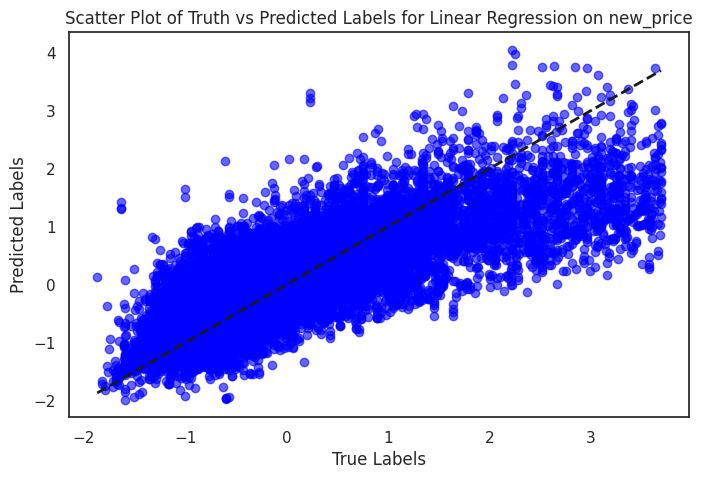


MODEL: Random Forest Regressor
Train R² Score: 0.979
Test R² Score: 0.851
Mean Absolute Error (MAE): 0.233
Mean Squared Error (MSE): 0.148
Root Mean Squared Error (RMSE): 0.385
Mean Absolute Percentage Error (MAPE): 163.291%


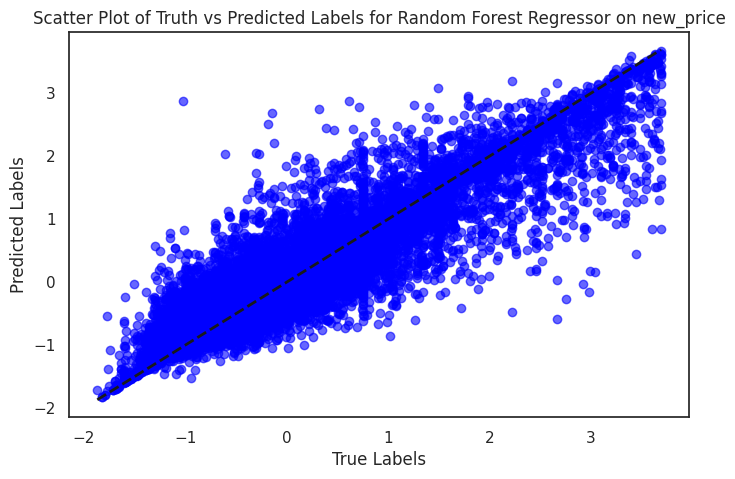


MODEL: XGBoost Regressor
Train R² Score: 0.832
Test R² Score: 0.779
Mean Absolute Error (MAE): 0.331
Mean Squared Error (MSE): 0.220
Root Mean Squared Error (RMSE): 0.469
Mean Absolute Percentage Error (MAPE): 363.705%


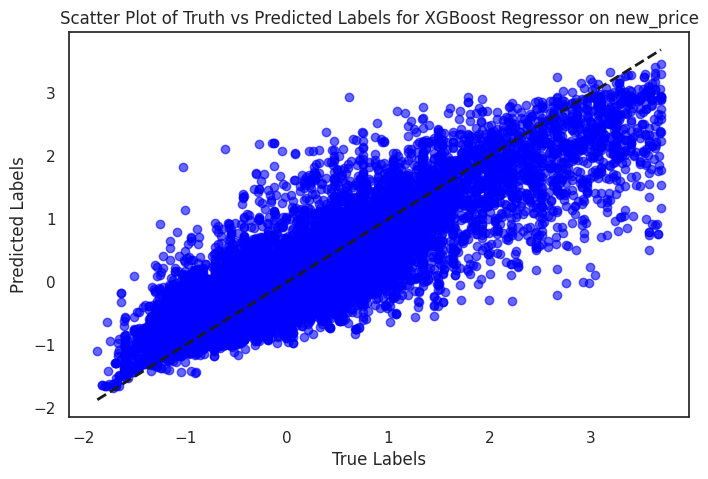


MODEL: Gradient Boosting Regressor
Train R² Score: 0.772
Test R² Score: 0.753
Mean Absolute Error (MAE): 0.354
Mean Squared Error (MSE): 0.245
Root Mean Squared Error (RMSE): 0.495
Mean Absolute Percentage Error (MAPE): 353.789%


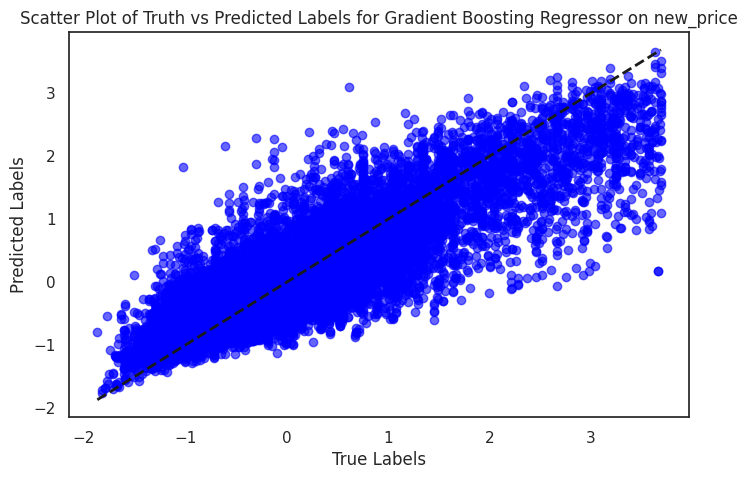


Training models for target variable: PI

MODEL: Linear Regression
Train R² Score: 1.000
Test R² Score: 1.000
Mean Absolute Error (MAE): 0.000
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.000
Mean Absolute Percentage Error (MAPE): 0.000%


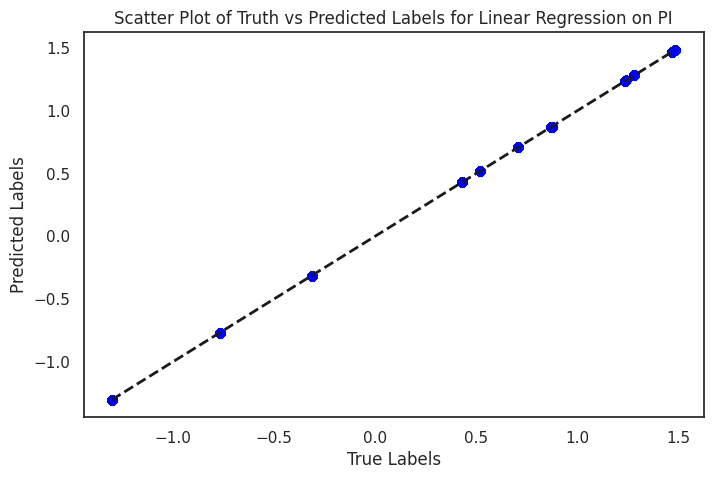


MODEL: Random Forest Regressor
Train R² Score: 1.000
Test R² Score: 1.000
Mean Absolute Error (MAE): 0.000
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.000
Mean Absolute Percentage Error (MAPE): 0.000%


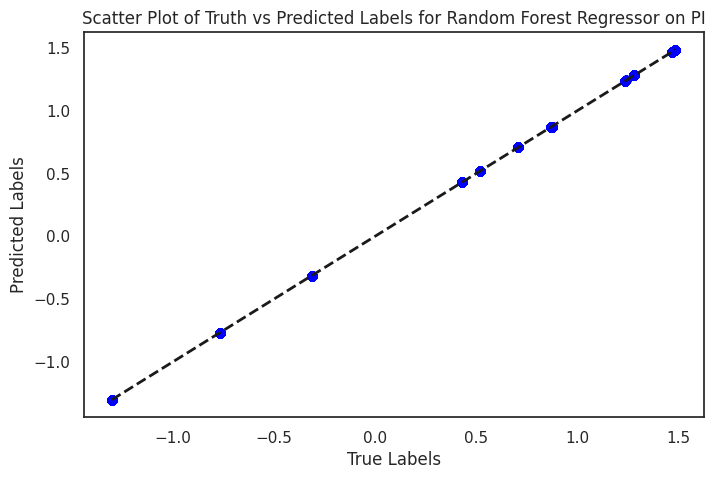


MODEL: XGBoost Regressor
Train R² Score: 1.000
Test R² Score: 1.000
Mean Absolute Error (MAE): 0.006
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.007
Mean Absolute Percentage Error (MAPE): 0.658%


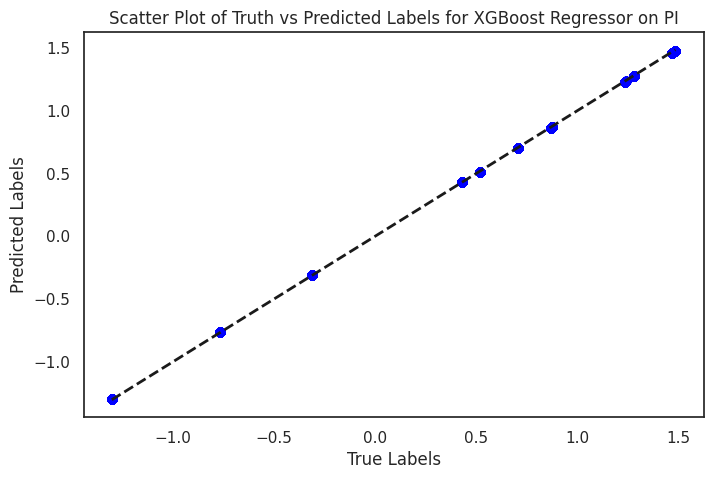


MODEL: Gradient Boosting Regressor
Train R² Score: 1.000
Test R² Score: 1.000
Mean Absolute Error (MAE): 0.000
Mean Squared Error (MSE): 0.000
Root Mean Squared Error (RMSE): 0.000
Mean Absolute Percentage Error (MAPE): 0.000%


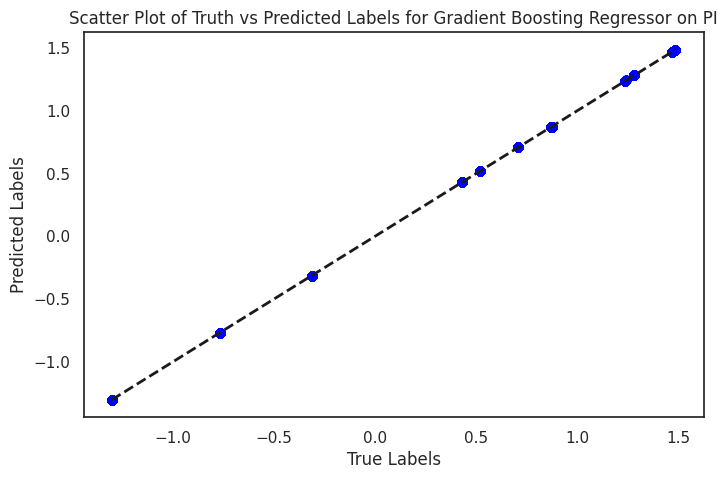


[INFO] Validating and updating master results table with the new results.

[INFO] Adding 8 new results to the master table.
[INFO] Master results table updated and saved to 'master_results.csv'.

Updated Master Results Table:
      Target                        Model  Train R²   Test R²           MAE  \
0  new_price            Linear Regression  0.601408  0.595691  4.716642e-01   
1  new_price      Random Forest Regressor  0.979135  0.850895  2.333770e-01   
2  new_price            XGBoost Regressor  0.832455  0.778517  3.312516e-01   
3  new_price  Gradient Boosting Regressor  0.772447  0.752945  3.536000e-01   
4         PI            Linear Regression  1.000000  1.000000  7.054472e-16   
5         PI      Random Forest Regressor  1.000000  1.000000  3.067508e-14   
6         PI            XGBoost Regressor  0.999957  0.999957  6.001523e-03   
7         PI  Gradient Boosting Regressor  1.000000  1.000000  1.008244e-08   

            MSE          RMSE          MAPE    Comments  
0  

In [13]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os  # For file handling

# Define the feature matrix (X) and target variables (y)
features = filtered_dataset120.drop(columns=['new_price', 'PI'])
targets_120 = filtered_dataset120[['new_price', 'PI']]

X = features.copy()
y = targets_120.copy()

# Initialize scalers for features and targets
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Scale the features and targets
X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y)

# Split the scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize models and their names
models = [
    "Linear Regression",
    "Random Forest Regressor",
    "XGBoost Regressor",
    "Gradient Boosting Regressor"
]

regressors = [
    LinearRegression(),
    RandomForestRegressor(random_state=42, n_estimators=300, max_depth=None),
    XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=500, max_depth=10),
    GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
]

# Define file path for the master results table
MASTER_RESULTS_FILE = "master_results.csv"

# Load the master results table if it exists, otherwise create an empty DataFrame
if os.path.exists(MASTER_RESULTS_FILE):
    master_results = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_results = pd.DataFrame(columns=["Target", "Model", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"Initialized a new master results table.")

# Function to evaluate a single model
def evaluate_model(regressor, model_name, X_train, X_test, y_train, y_test, target_name):
    """
    Evaluate a single model and return the metrics as a dictionary.
    """
    # Fit the model
    regressor.fit(X_train, y_train)  # Targets are already flattened
    train_prediction = regressor.predict(X_train)
    test_prediction = regressor.predict(X_test)

    # Metrics
    train_r2_score = r2_score(y_train, train_prediction)
    test_r2_score = r2_score(y_test, test_prediction)
    mae_val = mean_absolute_error(y_test, test_prediction)
    mse_val = mean_squared_error(y_test, test_prediction)
    rmse_val = np.sqrt(mse_val)
    mape_val = np.mean(
        np.abs((y_test.flatten() - test_prediction.flatten()) /
               np.where(y_test.flatten() == 0, 1, y_test.flatten()))) * 100

    # Return results as a dictionary
    return {
        "Target": target_name,
        "Model": model_name,
        "Train R²": train_r2_score,
        "Test R²": test_r2_score,
        "MAE": mae_val,
        "MSE": mse_val,
        "RMSE": rmse_val,
        "MAPE": mape_val,
    }

# Function to update the master results table
def update_master_results(new_results, master_results):
    """
    Update the master results table with new results, re-identify the best model for each target,
    and save the updated table to a CSV file.
    """
    # Append new results to the master table
    print(f"\n[INFO] Adding {len(new_results)} new results to the master table.")
    master_results = pd.concat([master_results, pd.DataFrame(new_results)], ignore_index=True)

    # Remove duplicates (if any) by keeping the latest entry for each model/target combination
    master_results = master_results.drop_duplicates(subset=["Target", "Model"], keep="last")

    # Re-identify the best model for each target based on the highest Test R²
    master_results["Comments"] = ""  # Reset comments
    for target in master_results["Target"].unique():
        best_model_idx = master_results[master_results["Target"] == target]["Test R²"].idxmax()
        master_results.loc[master_results.index == best_model_idx, "Comments"] = "Best Model"

    # Save the updated master table to the CSV file
    master_results.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated and saved to '{MASTER_RESULTS_FILE}'.")

    return master_results

# Main loop: Evaluate models for all target variables
new_results = []  # Store new results to be appended to the master table

# Example: Perform evaluation for each target variable
for target_name in targets_120.columns:  # Example columns: ['new_price', 'PI']
    print(f"\n{'='*125}")
    print(f"Training models for target variable: {target_name}")
    print(f"{'='*125}")

    # Use pre-scaled target columns
    y_train_target = y_train[:, targets_120.columns.get_loc(target_name)]  # Extract the target column
    y_test_target = y_test[:, targets_120.columns.get_loc(target_name)]    # Extract the target column

    # Loop through regressors
    for regressor, model_name in zip(regressors, models):
        print(f"\n{'='*125}\nMODEL: {model_name}\n{'='*125}")

        # Evaluate the model and collect the results
        metrics = evaluate_model(regressor, model_name, X_train, X_test, y_train_target, y_test_target, target_name)
        new_results.append(metrics)

        # Display metrics
        print(f"Train R² Score: {metrics['Train R²']:.3f}")
        print(f"Test R² Score: {metrics['Test R²']:.3f}")
        print(f"Mean Absolute Error (MAE): {metrics['MAE']:.3f}")
        print(f"Mean Squared Error (MSE): {metrics['MSE']:.3f}")
        print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.3f}")
        print(f"Mean Absolute Percentage Error (MAPE): {metrics['MAPE']:.3f}%")

        # Generate scatter plot for truth vs predicted labels
        plt.figure(figsize=(8, 5))
        plt.scatter(y_test_target, regressor.predict(X_test), alpha=0.6, color='blue')
        plt.plot([y_test_target.min(), y_test_target.max()], [y_test_target.min(), y_test_target.max()], 'k--', lw=2)
        plt.title(f'Scatter Plot of Truth vs Predicted Labels for {model_name} on {target_name}')
        plt.xlabel('True Labels')
        plt.ylabel('Predicted Labels')
        plt.savefig(f'scatter_{model_name}_{target_name}.png')  # Save the plot
        plt.show()

# Validate and update the master results table
if new_results:
    print(f"\n[INFO] Validating and updating master results table with the new results.")
    master_results = update_master_results(new_results, master_results)
else:
    print("[WARNING] No new results to add to the master table.")

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_results)

# BASE LSTM MODEL (using just 5 Epochs and a simple network to make sure it works as processing for full model with 50 epochs takes a long time)

In [14]:
# Check that data has been scaled
print("Feature scaling range (X):", X_train.min(), "to", X_train.max())
print("Target scaling range (y):", y_train.min(), "to", y_train.max())


Feature scaling range (X): -5.926639063874659 to 39.04876400283694
Target scaling range (y): -1.8658717310462751 to 3.689914710886667


In [15]:
# Import necessary libraries
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import os  # For file handling

# Define file path for the master results table
MASTER_RESULTS_FILE = "master_results.csv"

# Load the master results table if it exists, otherwise create an empty DataFrame
if os.path.exists(MASTER_RESULTS_FILE):
    master_results = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_results = pd.DataFrame(columns=["Target", "Model", "Type", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"Initialized a new master results table.")

# Initialize scalers for features
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Initialize a dictionary of scalers for each target column
target_scalers = {col: StandardScaler() for col in targets_120.columns}

# Scale targets independently for each column (ensure consistent Pandas DataFrame usage)
y_scaled = pd.DataFrame()  # Create an empty DataFrame to store scaled targets
for col in targets_120.columns:
    y_scaled[col] = target_scalers[col].fit_transform(targets_120[[col]]).flatten()  # Flatten the array to 1D

# Split the scaled dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop training if validation loss doesn't improve for 3 epochs
    restore_best_weights=True
)

# Iterate over each target variable for LSTM
new_results = []  # Store new results to append to the master file

for target_name in targets_120.columns:  # Example: ['new_price', 'PI']
    print(f"\n{'='*125}")
    print(f"Training LSTM model for target variable: {target_name}")
    print(f"{'='*125}")

    # Reshape data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Extract the already scaled target column as a NumPy array
    y_train_target = y_train[[target_name]].values
    y_test_target = y_test[[target_name]].values

    # Define LSTM model architecture
    lstm_model = Sequential([
        LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dropout(0.2),
        LSTM(64, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse')

    # Train LSTM with early stopping and epochs limited to 5
    history = lstm_model.fit(
        X_train_lstm,
        y_train_target,
        epochs=5,  # Limit epochs to 5
        batch_size=32,
        verbose=1,
        validation_data=(X_test_lstm, y_test_target),
        callbacks=[early_stopping]
    )

    # Predict using LSTM
    train_prediction = lstm_model.predict(X_train_lstm)
    test_prediction = lstm_model.predict(X_test_lstm)

    # Inverse transform predictions and true values for metrics
    scaler_y = target_scalers[target_name]  # Get the scaler for the current target
    train_prediction_rescaled = scaler_y.inverse_transform(train_prediction)
    test_prediction_rescaled = scaler_y.inverse_transform(test_prediction)

    y_train_rescaled = scaler_y.inverse_transform(y_train_target)
    y_test_rescaled = scaler_y.inverse_transform(y_test_target)

    # Calculate metrics
    train_r2_score = r2_score(y_train_rescaled, train_prediction_rescaled)
    test_r2_score = r2_score(y_test_rescaled, test_prediction_rescaled)
    mae_val = mean_absolute_error(y_test_rescaled, test_prediction_rescaled)
    mse_val = mean_squared_error(y_test_rescaled, test_prediction_rescaled)
    rmse_val = np.sqrt(mse_val)
    mape_val = np.mean(np.abs((y_test_rescaled - test_prediction_rescaled) / np.where(y_test_rescaled == 0, 1, y_test_rescaled))) * 100

    # Display metrics
    print(f"Train R² Score: {train_r2_score:.3f}")
    print(f"Test R² Score: {test_r2_score:.3f}")
    print(f"Mean Absolute Error (MAE): {mae_val:.3f}")
    print(f"Mean Squared Error (MSE): {mse_val:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_val:.3f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape_val:.3f}%")

    # Determine performance comments
    if train_r2_score - test_r2_score > 0.1:
        comment = "Overfitting"
    elif train_r2_score < 0.5 and test_r2_score < 0.5:
        comment = "Underfitting or Failing"
    elif test_r2_score > 0.75 and mape_val < 10:
        comment = "Working Well"
    elif test_r2_score < 0.5:
        comment = "Failing"
    else:
        comment = "Needs Improvement"

    # Store results in a dictionary to append later
    new_results.append({
        "Target": target_name,
        "Model": "Base LSTM",
        "Type": "Neural Network",
        "Train R²": train_r2_score,
        "Test R²": test_r2_score,
        "MAE": mae_val,
        "MSE": mse_val,
        "RMSE": rmse_val,
        "MAPE": mape_val,
        "Comments": comment
    })

# Append new results to the master results table
if new_results:
    print(f"\n[INFO] Adding {len(new_results)} new results to the master results table.")
    master_results = pd.concat([master_results, pd.DataFrame(new_results)], ignore_index=True)

    # Remove duplicates (if any) by keeping the latest entry for each model/target combination
    master_results = master_results.drop_duplicates(subset=["Target", "Model"], keep="last")

    # Save the updated master table to the CSV file
    master_results.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated and saved to '{MASTER_RESULTS_FILE}'.")
else:
    print("[WARNING] No new results to add to the master results table.")

# Display the updated master results table
print("\nUpdated Master Results Table:")
print(master_results)

Loaded existing master results table from 'master_results.csv'.

Training LSTM model for target variable: new_price
Epoch 1/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.4710 - val_loss: 0.3532
Epoch 2/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.3606 - val_loss: 0.3370
Epoch 3/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.3500 - val_loss: 0.3338
Epoch 4/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.3535 - val_loss: 0.3313
Epoch 5/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.3501 - val_loss: 0.3314
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
639/639 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train R² Score: 0.668
Test R² Score: 0.666
Mean Absolute Error (MAE): 1425858.858
Mean Squared Error (MSE): 3850929850583.719
Root Mean Squared Error (RMSE): 1962378.621
Mean Absolute Percentage Error (MAPE): 21.225%

Training LSTM model for target variable: PI
Epoch 1/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0677 - val_loss: 4.4110e-04
Epoch 

# LSTM ADDING EPOCHS AND COMPLEXITY

[INFO] Loaded existing master results table from 'master_results.csv'.

Training enhanced LSTM model for target variable: new_price
Epoch 1/50
2544/2556 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5942
Epoch 1: val_loss improved from inf to 0.36532, saving model to best_complex_lstm_model.keras
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 0.5937 - val_loss: 0.3653
Epoch 2/50
2549/2556 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4094
Epoch 2: val_loss improved from 0.36532 to 0.35209, saving model to best_complex_lstm_model.keras
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.4094 - val_loss: 0.3521
Epoch 3/50
2550/2556 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4077
Epoch 3: val_loss improved from 0.35209 to 0.34646, saving model to best_complex_lstm_model.keras
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.4077 - val_loss: 0.3465
Epoch 4/50
2548/2556 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3966
Epoch 4: val_loss improved from 0.34646 to 0.33725, saving model to 

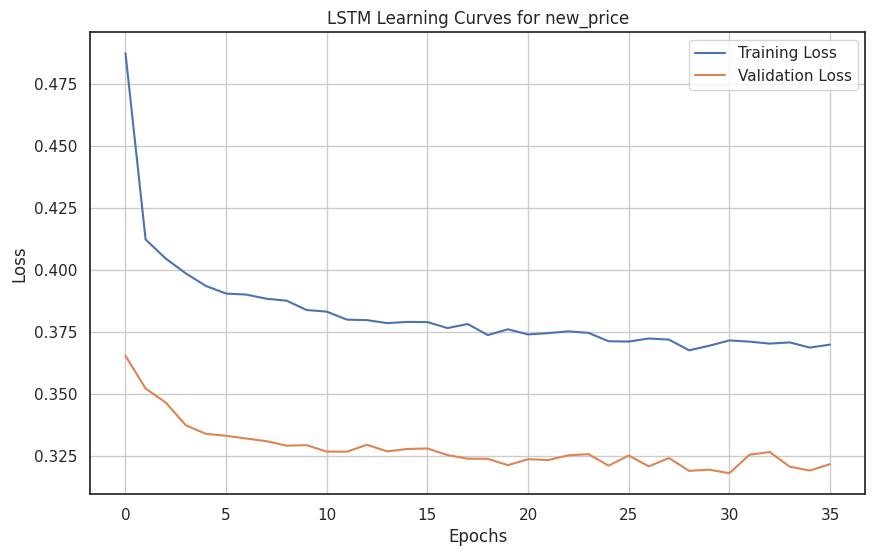

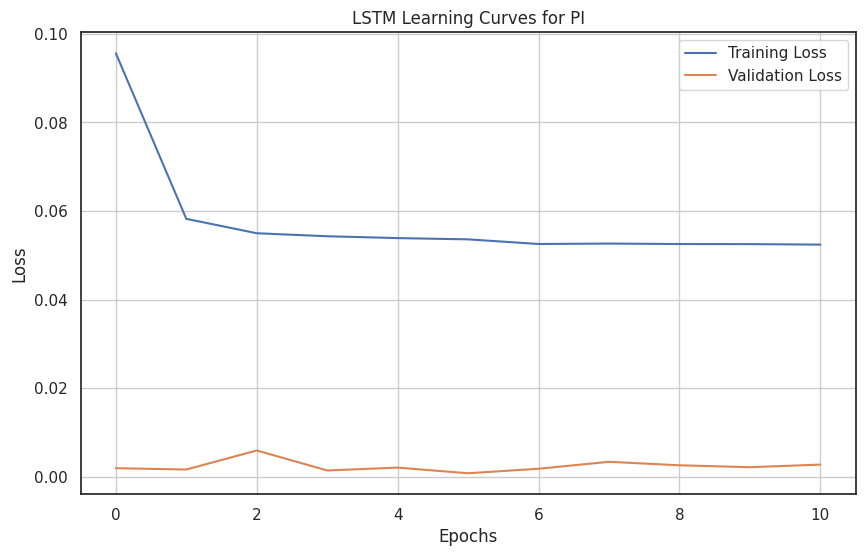


Updated Master Results Table:
   Target                       Model  Train R²  Test R²          MAE          MSE         RMSE         MAPE          Comments           Type
new_price           Linear Regression  0.601408 0.595691 4.716642e-01 4.013769e-01 6.335431e-01 4.525806e+02               NaN            NaN
new_price     Random Forest Regressor  0.979135 0.850895 2.333770e-01 1.480237e-01 3.847385e-01 1.632906e+02        Best Model            NaN
new_price           XGBoost Regressor  0.832455 0.778517 3.312516e-01 2.198767e-01 4.689101e-01 3.637050e+02               NaN            NaN
new_price Gradient Boosting Regressor  0.772447 0.752945 3.536000e-01 2.452632e-01 4.952406e-01 3.537886e+02               NaN            NaN
       PI           Linear Regression  1.000000 1.000000 7.054472e-16 8.754178e-31 9.356376e-16 9.947874e-14        Best Model            NaN
       PI     Random Forest Regressor  1.000000 1.000000 3.067508e-14 1.684234e-27 4.103942e-14 3.244676e-12         

In [16]:
# Import necessary libraries
import os
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# File paths
MASTER_RESULTS_FILE = "master_results.csv"
HYPERPARAMETER_HISTORY_FILE = "complex_lstm_histories.csv"
BEST_MODEL_FILE = "best_complex_lstm_model.keras"
BEST_MODEL_SUMMARY_FILE = "best_model_summary.csv"

# Load or initialize master results table
if os.path.exists(MASTER_RESULTS_FILE):
    master_results = pd.read_csv(MASTER_RESULTS_FILE)
    print(f"[INFO] Loaded existing master results table from '{MASTER_RESULTS_FILE}'.")
else:
    master_results = pd.DataFrame(columns=["Target", "Model", "Type", "Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE", "Comments"])
    print(f"[INFO] Initialized a new master results table.")

# Initialize scalers
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)
target_scalers = {col: StandardScaler() for col in targets_120.columns}

y_scaled = pd.DataFrame()
for col in targets_120.columns:
    y_scaled[col] = target_scalers[col].fit_transform(targets_120[[col]]).flatten()

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Prepare to save results
new_results = []
history_records = []
best_model_val_loss = float("inf")  # Track the best validation loss

# Initialize a dictionary to store learning curves for all targets
learning_curves = {}

for target_name in targets_120.columns:
    print(f"\n{'='*125}")
    print(f"Training enhanced LSTM model for target variable: {target_name}")
    print(f"{'='*125}")

    # Reshape data for LSTM
    X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    y_train_target = y_train[[target_name]].values
    y_test_target = y_test[[target_name]].values

    # Enhanced LSTM architecture
    lstm_model = Sequential([
        LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dropout(0.3),
        LSTM(32, activation='relu', return_sequences=True),
        Dropout(0.3),
        LSTM(16, activation='relu'),
        Dropout(0.3),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse')

    # Callback to save the best model
    model_checkpoint = ModelCheckpoint(
        BEST_MODEL_FILE,
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )

    # Train the model
    history = lstm_model.fit(
        X_train_lstm,
        y_train_target,
        epochs=50,
        batch_size=32,
        verbose=1,
        validation_data=(X_test_lstm, y_test_target),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Save training history
    history_df = pd.DataFrame(history.history)
    history_df["Target"] = target_name  # Add the target name to the history
    history_records.append(history_df)

    # Store learning curves
    learning_curves[target_name] = {
        "train_loss": history.history["loss"],
        "val_loss": history.history["val_loss"]
    }

    # Check if the current model is the best based on validation loss
    final_val_loss = min(history.history["val_loss"])
    if final_val_loss < best_model_val_loss:
        best_model_val_loss = final_val_loss
        print(f"[INFO] Best model updated for target '{target_name}' with validation loss: {best_model_val_loss:.4f}")

    # Predictions and metrics
    train_prediction = lstm_model.predict(X_train_lstm)
    test_prediction = lstm_model.predict(X_test_lstm)

    scaler_y = target_scalers[target_name]
    train_prediction_rescaled = scaler_y.inverse_transform(train_prediction)
    test_prediction_rescaled = scaler_y.inverse_transform(test_prediction)

    y_train_rescaled = scaler_y.inverse_transform(y_train_target)
    y_test_rescaled = scaler_y.inverse_transform(y_test_target)

    train_r2_score = r2_score(y_train_rescaled, train_prediction_rescaled)
    test_r2_score = r2_score(y_test_rescaled, test_prediction_rescaled)
    mae_val = mean_absolute_error(y_test_rescaled, test_prediction_rescaled)
    mse_val = mean_squared_error(y_test_rescaled, test_prediction_rescaled)
    rmse_val = np.sqrt(mse_val)
    mape_val = np.mean(np.abs((y_test_rescaled - test_prediction_rescaled) /
                              np.where(y_test_rescaled == 0, 1, y_test_rescaled))) * 100

    # Performance comments
    if train_r2_score - test_r2_score > 0.1:
        comment = "Overfitting"
    elif train_r2_score < 0.5 and test_r2_score < 0.5:
        comment = "Underfitting or Failing"
    elif test_r2_score > 0.75 and mape_val < 10:
        comment = "Working Well"
    elif test_r2_score < 0.5:
        comment = "Failing"
    else:
        comment = "Needs Improvement"

    new_results.append({
        "Target": target_name,
        "Model": "Enhanced LSTM",
        "Type": "Neural Network",
        "Train R²": train_r2_score,
        "Test R²": test_r2_score,
        "MAE": mae_val,
        "MSE": mse_val,
        "RMSE": rmse_val,
        "MAPE": mape_val,
        "Comments": comment
    })

# Append results to master table
if new_results:
    master_results = pd.concat([master_results, pd.DataFrame(new_results)], ignore_index=True)
    master_results.to_csv(MASTER_RESULTS_FILE, index=False)
    print(f"[INFO] Master results table updated and saved to '{MASTER_RESULTS_FILE}'.")

# Save hyperparameter tuning histories to a single CSV file
if history_records:
    all_history_df = pd.concat(history_records, ignore_index=True)
    all_history_df.to_csv(HYPERPARAMETER_HISTORY_FILE, index=False)
    print(f"[INFO] Hyperparameter tuning histories saved to '{HYPERPARAMETER_HISTORY_FILE}'.")

# Plot learning curves for all targets
for target_name, curves in learning_curves.items():
    plt.figure(figsize=(10, 6))
    plt.plot(curves["train_loss"], label="Training Loss")
    plt.plot(curves["val_loss"], label="Validation Loss")
    plt.title(f"LSTM Learning Curves for {target_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

# Display the summary table
print("\nUpdated Master Results Table:")
print(master_results.to_string(index=False))


[INFO] Master Results File:
       Target                        Model  Train R²   Test R²           MAE  \
0   new_price            Linear Regression  0.601408  0.595691  4.716642e-01   
1   new_price      Random Forest Regressor  0.979135  0.850895  2.333770e-01   
2   new_price            XGBoost Regressor  0.832455  0.778517  3.312516e-01   
3   new_price  Gradient Boosting Regressor  0.772447  0.752945  3.536000e-01   
4          PI            Linear Regression  1.000000  1.000000  7.054472e-16   
5          PI      Random Forest Regressor  1.000000  1.000000  3.067508e-14   
6          PI            XGBoost Regressor  0.999957  0.999957  6.001523e-03   
7          PI  Gradient Boosting Regressor  1.000000  1.000000  1.008244e-08   
8   new_price                    Base LSTM  0.668216  0.666281  1.425859e+06   
9          PI                    Base LSTM  0.999555  0.999558  9.299883e-02   
10  new_price                Enhanced LSTM  0.686986  0.679755  1.390046e+06   
11         

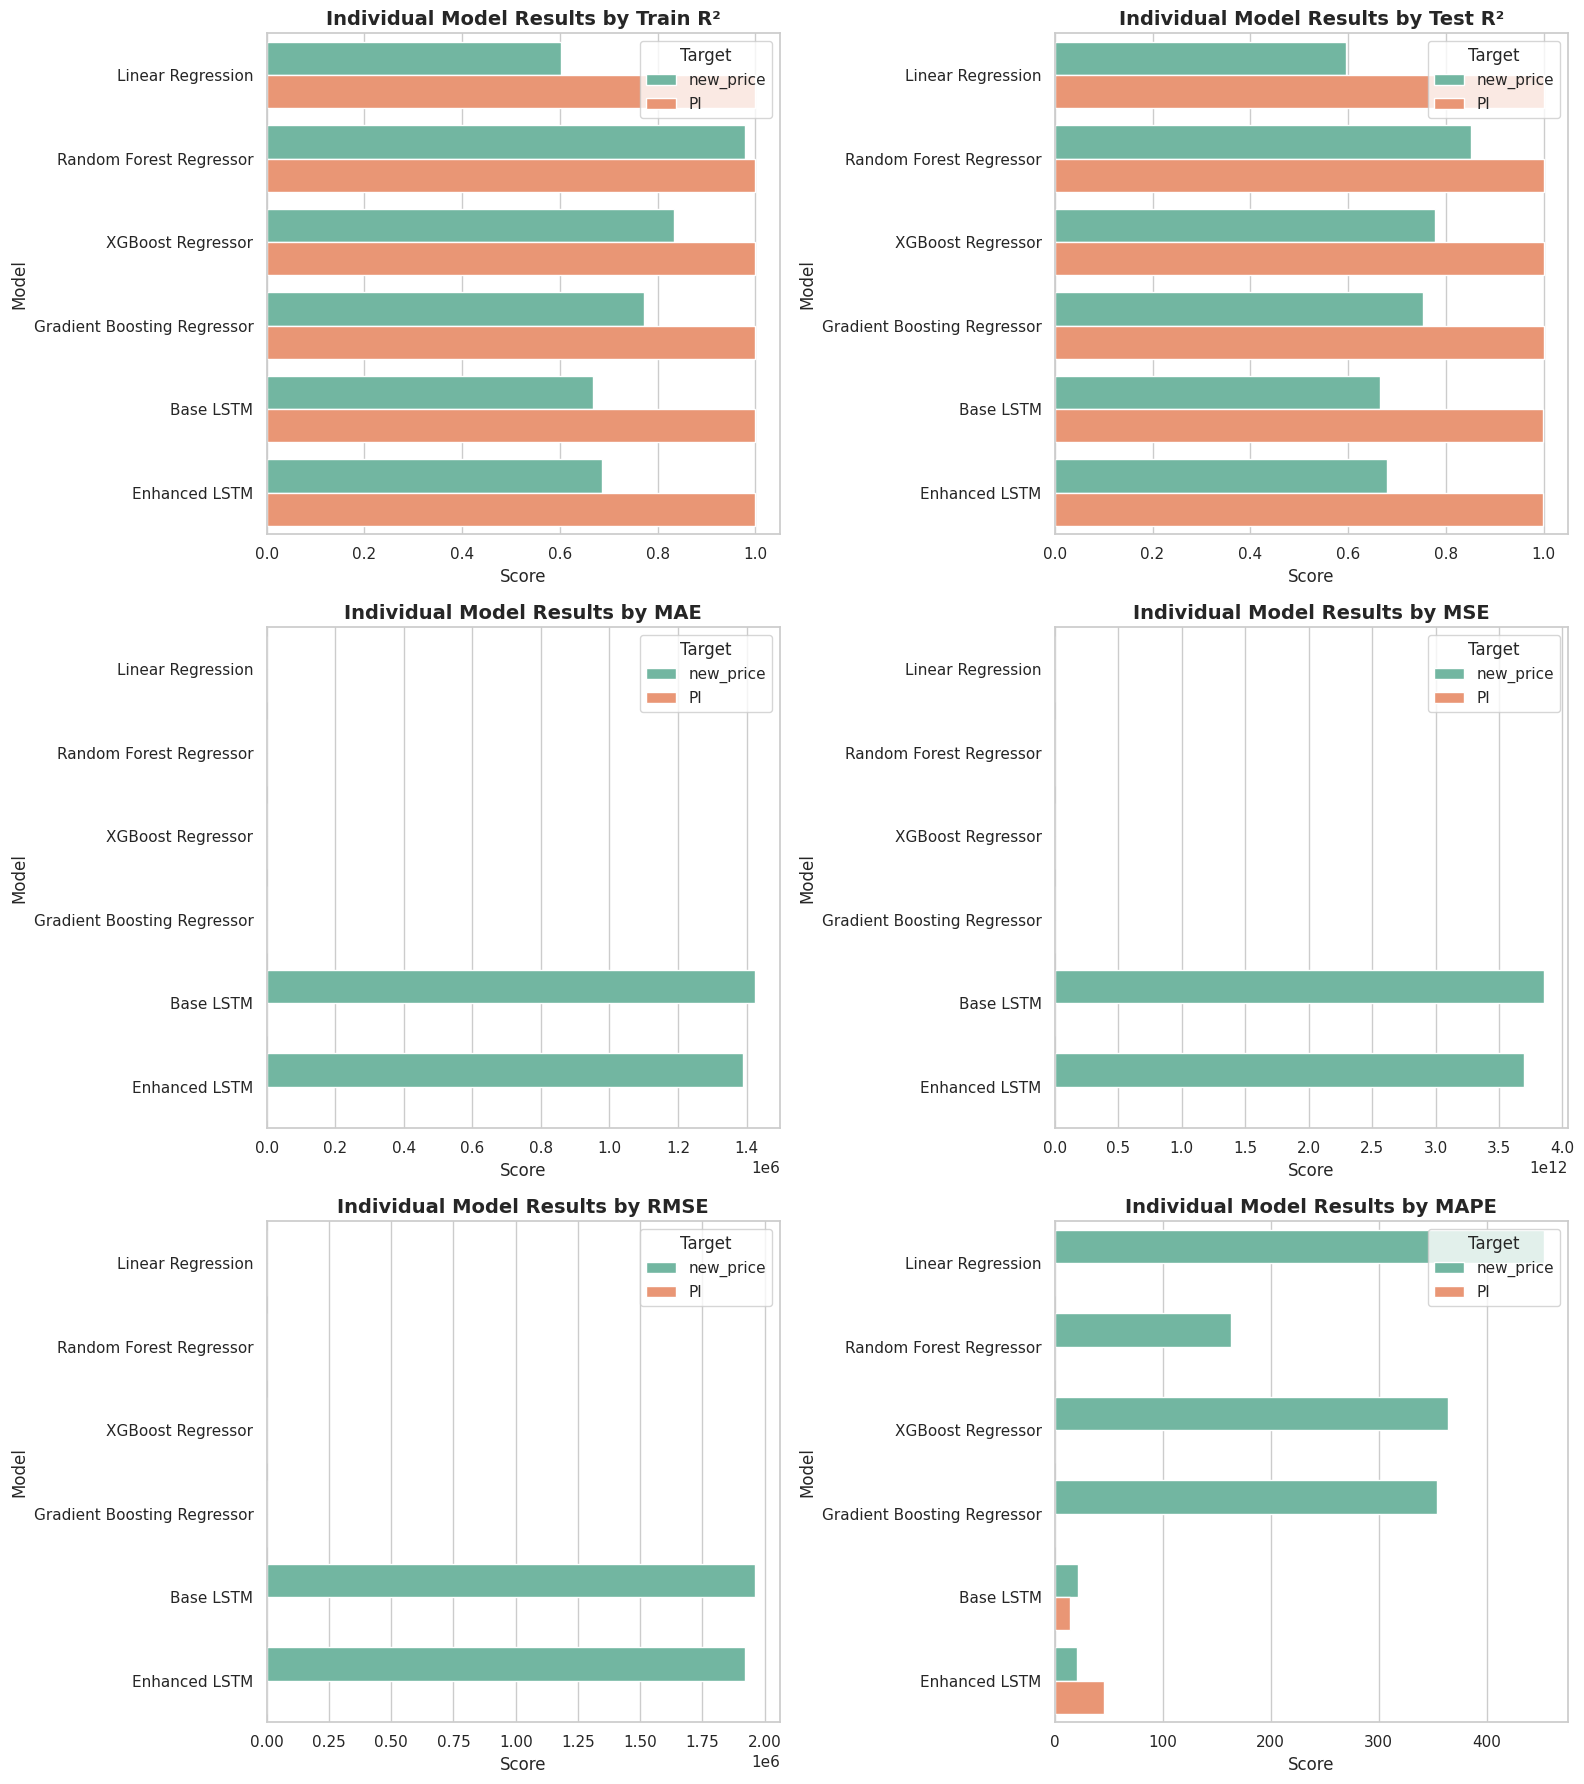

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the master results file
MASTER_RESULTS_FILE = "master_results.csv"
master_results = pd.read_csv(MASTER_RESULTS_FILE)

# Print the master results file for debugging
print("\n[INFO] Master Results File:")
print(master_results)

# Validate the master results file structure
print("\n[INFO] Columns in Master Results File:", master_results.columns)

# Set the style for plots
sns.set(style="whitegrid")

# Define performance criteria
criteria = ["Train R²", "Test R²", "MAE", "MSE", "RMSE", "MAPE"]
colors = ["#87CEEB", "#90EE90", "#FFA07A", "#FFD700", "#ADD8E6", "#FFC0CB"]  # For visual distinction

# Ensure the individual results are used (no grouping by "Model")
# We'll plot individual results based on "Target" and "Model"
# Create a plot for each performance criterion
fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # 3 rows x 2 columns for 6 criteria
axes = axes.flatten()  # Flatten the axes for easier iteration

for i, criterion in enumerate(criteria):
    ax = axes[i]

    # Create a bar plot for the current criterion (individual results)
    sns.barplot(
        x=criterion,
        y="Model",
        hue="Target",  # Differentiate targets using colors
        data=master_results,
        ax=ax,
        palette="Set2",  # Use seaborn's color palette for better distinction
        errorbar=None  # Disable error bars
    )

    # Set plot titles and labels
    ax.set_title(f"Individual Model Results by {criterion}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Score", fontsize=12)
    ax.set_ylabel("Model", fontsize=12)
    ax.legend(title="Target", loc="upper right")

# Adjust layout
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("individual_model_performance_comparison.png")

# Show the plots
plt.show()

# Save the Data Frame

In [19]:
import os
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the subdirectory path
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Define file path for 'filtered_dataset120ML.csv' in the subdirectory
file_path = os.path.join(subdirectory, 'filtered_dataset120ML.csv')

# Check if the file exists, then load it
if os.path.exists(file_path):
    filtered_dataset120 = pd.read_csv(file_path)
    print(f"File 'filtered_dataset120ML.csv' loaded successfully!")
    print(f"DataFrame shape: {filtered_dataset120.shape}")
else:
    print(f"File 'filtered_dataset120ML.csv' not found in '{subdirectory}'. Please check the file path.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File 'filtered_dataset120ML.csv' loaded successfully!
DataFrame shape: (102229, 58)


In [23]:
print(master_results.head(20))
print(master_results.shape)

       Target                        Model  Train R²   Test R²           MAE  \
0   new_price            Linear Regression  0.601408  0.595691  4.716642e-01   
1   new_price      Random Forest Regressor  0.979135  0.850895  2.333770e-01   
2   new_price            XGBoost Regressor  0.832455  0.778517  3.312516e-01   
3   new_price  Gradient Boosting Regressor  0.772447  0.752945  3.536000e-01   
4          PI            Linear Regression  1.000000  1.000000  7.054472e-16   
5          PI      Random Forest Regressor  1.000000  1.000000  3.067508e-14   
6          PI            XGBoost Regressor  0.999957  0.999957  6.001523e-03   
7          PI  Gradient Boosting Regressor  1.000000  1.000000  1.008244e-08   
8   new_price                    Base LSTM  0.668216  0.666281  1.425859e+06   
9          PI                    Base LSTM  0.999555  0.999558  9.299883e-02   
10  new_price                Enhanced LSTM  0.686986  0.679755  1.390046e+06   
11         PI                Enhanced LS

In [26]:
# Import necessary libraries
import os
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)  # Use force_remount=True to ensure proper mounting

# Define the subdirectory path in Google Drive
subdirectory = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'

# Ensure the subdirectory exists
os.makedirs(subdirectory, exist_ok=True)

# Define the file path for master_results.csv
master_results_file_path = os.path.join(subdirectory, 'master_results.csv')

# Save the master results table
if 'master_results' in locals() or 'master_results' in globals():
    try:
        # Save the master_results DataFrame as a CSV file
        master_results.to_csv(master_results_file_path, index=False)
        print(f"[INFO] File 'master_results.csv' has been saved successfully in '{subdirectory}'.")
    except Exception as e:
        print(f"[ERROR] Error saving 'master_results.csv': {e}")
else:
    print("[WARNING] The DataFrame 'master_results' does not exist in memory. Skipping save operation.")

# Optionally unmount Google Drive
drive.flush_and_unmount()
print("[INFO] Drive unmounted. Please refresh Google Drive in your browser to confirm the file is saved.")

Mounted at /content/drive
[INFO] File 'master_results.csv' has been saved successfully in '/content/drive/My Drive/Colab Notebooks/M5 Code and Data'.
[INFO] Drive unmounted. Please refresh Google Drive in your browser to confirm the file is saved.
